#	Simulation Tool For Road Safety Exploratory Analysis : Tutorial

##	Python 3.7
The scripts used in this tool use Python coding language. The version used is Python 3.7. 

## Requirement

A file requirements.txt is available at the root of the project. It is required to be installed in order to use the tool.
To do so, run the following line in your shell :


In [ ]:
$pip install -r requirements.txt

# Creating a simulation world
##	Alignments
An alignment is an object of type moving.Trajectory. For example, if you want to make an alignment whose width equals 3.7m, starting form point A(0, 0) to point B(0, 500):

In [2]:
from trafficintelligence import moving 
import network
import matplotlib.pyplot as plt

A = moving.Point(0,0)
B = moving.Point(0,500)
alignmentPoints = moving.Trajectory.fromPointList([A,B])

In the previous lines of codes we have generated the list of moving points which make up for the alignment.
An alignment has an unique id, and its width. They are attributed with the following lines:


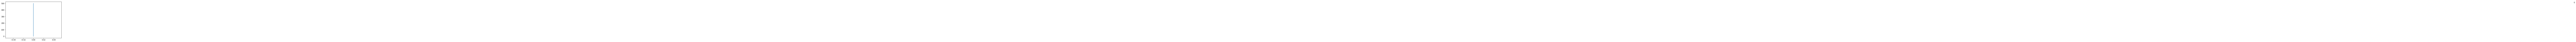

In [3]:
alignment = network.Alignment(idx=0,
                              width=3.7,
                              points=alignmentPoints)
alignment.plot()
plt.show()

## Distributions
A Distribution is an object of network.distribution type. It is useful when creating a generator of users. A distribution object represents a statistic distribution by its parameters (mean, standard deviation, and constant in the case of a degenerated distribution, cumulative frequency curve, name, and type of distribution. 

Thus, each variable subjected to a random selection takes its parameters from this Distribution object.
For a user, it is necessary to instantiate the parameters tau, dn, headway, length, speed, criticalGap

In [4]:
distributions = {'dn': network.Distribution(cdf=None,
                                            degeneratedConstant=None,
                                            distributionName='truncnorm', 
                                            distributionType='theoretic', 
                                            loc=8.333333,
                                            scale=1,
                                            a=-2,
                                            b=2),
                 'headway':network.Distribution(cdf=None,
                                                degeneratedConstant=None,
                                                distributionName='expon', 
                                                distributionType='theoretic', 
                                                loc=.5,
                                                scale=1),
                 'length':network.Distribution(cdf=None,
                                               degeneratedConstant=None,
                                               distributionName='truncnorm',
                                               distributionType='theoretic',
                                               loc=7,
                                               scale=1,
                                               a=-2,
                                               b=2),
                 'speed':network.Distribution(cdf=None,
                                                degeneratedConstant=None,
                                                distributionName='truncnorm', 
                                                distributionType='theoretic', 
                                                loc=14,
                                                scale=3,
                                                a=-1,
                                                b=1),
                 'tau':network.Distribution(cdf=None,
                                                degeneratedConstant=None,
                                                distributionName='truncnorm', 
                                                distributionType='theoretic', 
                                                loc=2,
                                                scale=.5,
                                                a=-2,
                                                b=2), 
                 'criticalGap':network.Distribution(cdf=None,
                                                degeneratedConstant=2,
                                                distributionName='truncnorm', 
                                                distributionType='degenerated', 
                                                loc=0,
                                                scale=0),
                 'amberProbability':network.Distribution(cdf=None,
                                                degeneratedConstant=2,
                                                distributionName='truncnorm', 
                                                distributionType='degenerated', 
                                                loc=0,
                                                scale=0)
                }


## User demand
A user input is an object of type network.UserInput. It is an entry point on the network that generates users with characteristics (vehicle length, dn, t, inter-vehicle time, desired speed) drawn from distributions specific to each entry point.

The following line explains how to create a userInput and also how to link it to the previous created alignment.

In [5]:
userInput = network.UserInput(idx=0,
                              alignmentIdx=alignment.idx,
                              distributions=distributions)

## Control devices
A control device is an object of type network.ControlDevice. This data structure makes it possible to take into account stop signs, yield signs, as well as traffic lights. A control device is necessarily linked to an alignment. 

The user has to specify the duration each driver is going to spend at a control device in the case of a stop sign. In this example, the value is set to 2 sec.

A stop sign is created and linked to the previously created alignment.
The control devices are by default attached to the very end of the alignment.

In [6]:
controlDevice = network.StopSign(idx=0, alignmentIdx=0, stopDuration=2)

## World
The 'world' is the data structure that brings together alignments, control devices, user generators, and users (the creation of these is explained later). It is necessary to add these attributes to the network.World object that have been created.



In [7]:
# création de l'objet World
world = network.World(alignments = [alignment],
                      controlDevices = [controlDevice], 
                       userInputs = [userInput])

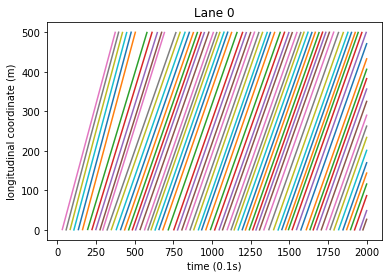

In [8]:
import simulation
sim = simulation.Simulation.load('config.yml')   
sim.run(world)
world.plotUserTrajectories(sim.timeStep)

A World has been created. It is now possible to generate users that will move along the alignments. Afterwards, it is possible to save the created world and then load it, thanks to the 'save' and 'load' methods of the network.World class.

## Simulation parameters

The file 'config.yml' contains the configuration parameters needed in order to perform a simulation:

- duration: duration of a simulation (s)
- timeStep: step between each calculation of position (s)
- seed: parameter that defines the sequence of random values that will be generated
- verbose: boolean to print simulation steps
- increment: value of increment for seeds 
- dbName: database name

# Traffic simulation along a road

As a reminder: a portion of road is represented by a succession of alignments. In order to compute road traffic on an alignment, a userInput has to be defined and linked on an alignment. 

In [9]:
import network, simulation

world = network.World.load('simple-net.yml')
sim = simulation.Simulation.load('config.yml')   
sim.run(world)

# Analysis of output data

## Sensitivity analysis
To run a sensitivity analysis, run sensivity-analysis.py.
The script will ask for the number of points of variation, then the value of desired applied variations for location parameter or degenerated constant. The analysis is then processed, the results are available in the corresponding database.

## Influence of observation set up 
To study the influence of the observation set up, run zoneinfluence.py
parameters are :
- --rep : the number of replications for a simulation 
- --duration: duration of each replication

Results are automatically saved in the corresponding database.

### Influence of change in headway distributions

To carry this type of analysis, run headwayinfluence.py with parameters :
- --rep : the number of replications for a simulation 
- --duration: duration of each replication

Results are automatically saved in the corresponding database.

## Influence of control devices
To carry this type of analysis, run headwayinfluence.py, then in the interface enter the information related to the world.

The script will ask for the number of repeteitions for a simulation, duration of each replication, number of control devices,  types of control devices, and linked alignments for each control devices. 
The analysis is then processed, the results are available in the corresponding database.

# Database
## Saving trajectories

It is possible to save trajectories for each user of the world. To do so, in the configuration file (config.yml), enter a name for the future database that will contain all the information.
Add the following line to your code: 

In [15]:
import analysis as an
analysis = an.Analysis(idx=0, world=world, seed=sim.seed)

network.createNewellMovingObjectsTable(sim.dbName)
world.saveObjects(sim.dbName, sim.seed, analysis.idx)
world.saveTrajectoriesToDB(sim.dbName, sim.seed, analysis.idx)

## Saving indicators
The simulation is also able to save the values for computed indicators. To do so, create an analysis instance:

In [11]:
import analysis as an
analysis = an.Analysis(idx=0, world=world, seed=sim.seed)

Then evaluate the value of SMoS:

In [12]:
analysis.evaluate(sim.timeStep, sim.duration)

Save the data with the following lines:

In [13]:
distributions['headway'].getMinThreshold()

In [14]:
an.createAnalysisTable(sim.dbName)
analysis.saveParametersToTable(sim.dbName)
analysis.saveIndicators(sim.dbName)